## Лабораторна робота № 2

### ІП-14 Бабіч Денис (№ 91 у журналі, варіант I)

### Підготовчий етап

#### Імпортування модулів

In [1]:
import numpy as np
import skfuzzy as fuzz
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

#### Допомоіжні функції

##### Функція побудови графіків

In [14]:
def build_plot(*plot_arguments: dict, title: str = None) -> None:
    plt.grid(True)
    plt.title(title)
    
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    
    for data in plot_arguments:
        x_values = data.get("x_values", [])
        y_values = data.get("y_values", [])
        label = data.get("label", None)
        color = data.get("color", "black")
        linestyle = data.get("linestyle", '-')
        
        if isinstance(x_values[0], np.ndarray):
            if isinstance(y_values[0], np.ndarray):
                for i, j in range(len(x_values)), range(len(y_values)):
                    plt.plot(x_values[i], y_values[j], color = colors[i % len(colors)], linestyle = linestyle, label = label)
            else:
                for i in range(len(x_values)):
                    plt.plot(x_values[i], y_values, color = colors[i % len(colors)], linestyle = linestyle, label = label)
        else:
            if isinstance(y_values[0], np.ndarray):
                for i in range(len(y_values)):
                    plt.plot(x_values, y_values[i], color = colors[i % len(colors)], linestyle = linestyle, label = label)
            else:
                plt.plot(x_values, y_values, color = color, linestyle = linestyle, label = label)
    
    if label is not None:
        plt.legend(loc="upper right")
    
    plt.show()

##### Функції приналежності з максимальною ординатою, таблиць значень функцій та їх назв 

In [15]:
def get_max_function(value: float, gaussian_values: np.ndarray, z_values: np.ndarray) -> None:
    index = min(range(len(z_values)), key = lambda i: abs(z_values[i] - value))
    values = [function_value[index] for function_value in gaussian_values]
    return values.index(max(values))


def build_functions_table(x_means: np.ndarray, y_means: np.ndarray, z_values: np.ndarray, gaussian_z_values: np.ndarray, in_count: int) -> None:
    data = [[""] + [f"mx{i}" for i in range(1, in_count + 1)]]

    for i in range(in_count):
        row = ["my" + str(i + 1)]
        for j in range(in_count):
            z = np.cos(y_means[i] + x_means[j] / 2)
            best_function = get_max_function(z, gaussian_z_values, z_values)
            row.append("mf" + str(best_function + 1))
        data.append(row)

    print(tabulate(data, headers = "firstrow", tablefmt = "fancy_grid"))


def generate_rules(x_means: np.ndarray, y_means: np.ndarray, z_values: np.ndarray, gaussian_z_values: np.ndarray, in_count: int) -> list(list()):
    rules = []

    for i in range(in_count):
        for j in range(in_count):
            z_value = np.cos(y_means[i] + x_means[j] / 2)
            best_function = get_max_function(z_value, gaussian_z_values, z_values)
            rule = (j, i, best_function)
            rules.append(rule)

    return rules

### Основний етап

#### Підготовка даних

##### Початкові дані

In [16]:
X_MIN = 1.0
X_MAX = 5.0
STEP = 0.001

x_values = np.linspace(X_MIN, X_MAX, round((X_MAX - X_MIN) / STEP + 1))
y_values = np.sin(x_values) + np.cos(x_values / 2)
z_values = np.sin(2 * np.sqrt(x_values ** 2 + y_values ** 2)) / (np.sqrt(x_values ** 2 + y_values ** 2) + 0.001)

IN_COUNT = 6
OUT_COUNT = 9

x_means = np.linspace(min(x_values), max(x_values), num = IN_COUNT)
y_means = np.linspace(min(y_values), max(y_values), num = IN_COUNT)
z_means = np.linspace(min(z_values), max(z_values), num = OUT_COUNT)

##### Візуалізація значень Y-функції та Z-функції

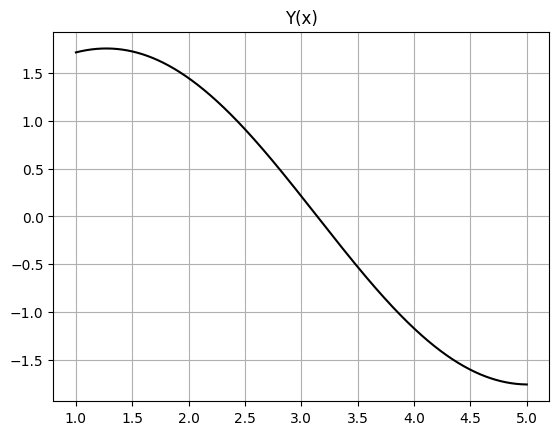

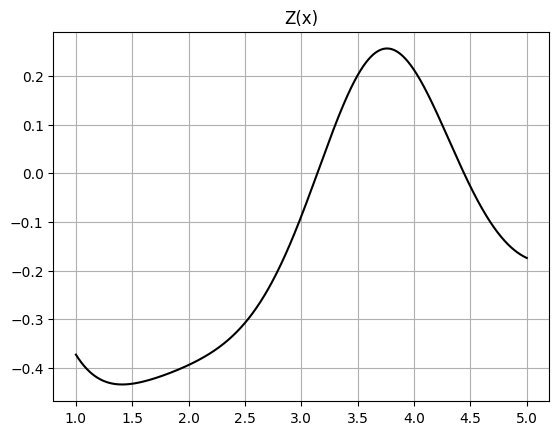

In [17]:
plot_arguments_y = {
    "x_values": x_values,
    "y_values": y_values
}

plot_arguments_z = {
    "x_values": x_values,
    "y_values": z_values
}

build_plot(plot_arguments_y, title = "Y(x)")
build_plot(plot_arguments_z, title = "Z(x)")

#### Гаусівська функція приналежності

##### Розбиття даних на проміжки

In [18]:
X_SIGMA = 0.1
Y_SIGMA = 0.3
Z_SIGMA = 0.1

gaussian_x_values = [fuzz.gaussmf(x_values, mean, X_SIGMA) for mean in x_means]
gaussian_y_values = [fuzz.gaussmf(y_values, mean, Y_SIGMA) for mean in y_means]
gaussian_z_values = [fuzz.gaussmf(z_values, mean, Z_SIGMA) for mean in z_means]

##### Візуалізація функцій приналежності Гаусса

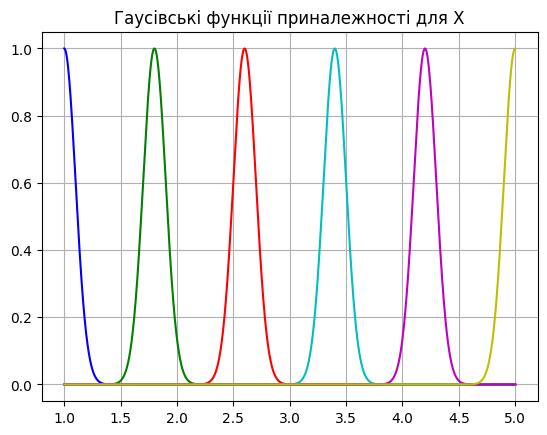

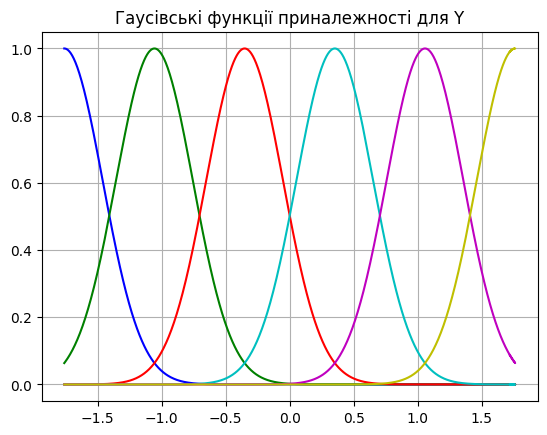

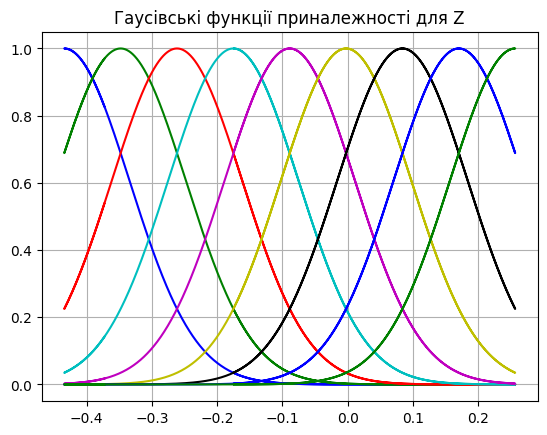

In [19]:
plot_arguments_x = {
    "x_values": x_values,
    "y_values": gaussian_x_values
}

plot_arguments_y = {
    "x_values": y_values,
    "y_values": gaussian_y_values
}

plot_arguments_z = {
    "x_values": z_values,
    "y_values": gaussian_z_values
}

build_plot(plot_arguments_x, title = "Гаусівські функції приналежності для X")
build_plot(plot_arguments_y, title = "Гаусівські функції приналежності для Y")
build_plot(plot_arguments_z, title = "Гаусівські функції приналежності для Z")

##### Таблиця назв функцій

In [20]:
build_functions_table(x_means, y_means, z_values, gaussian_z_values, IN_COUNT)

╒═════╤═══════╤═══════╤═══════╤═══════╤═══════╤═══════╕
│     │ mx1   │ mx2   │ mx3   │ mx4   │ mx5   │ mx6   │
╞═════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╡
│ my1 │ mf9   │ mf9   │ mf9   │ mf9   │ mf9   │ mf9   │
├─────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ my2 │ mf9   │ mf9   │ mf9   │ mf9   │ mf9   │ mf7   │
├─────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ my3 │ mf9   │ mf9   │ mf9   │ mf9   │ mf4   │ mf1   │
├─────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ my4 │ mf9   │ mf9   │ mf5   │ mf1   │ mf1   │ mf1   │
├─────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ my5 │ mf6   │ mf2   │ mf1   │ mf1   │ mf1   │ mf1   │
├─────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ my6 │ mf1   │ mf1   │ mf1   │ mf1   │ mf1   │ mf1   │
╘═════╧═══════╧═══════╧═══════╧═══════╧═══════╧═══════╛


##### Отримані правила

In [21]:
rules = generate_rules(x_means, y_means, z_values, gaussian_z_values, IN_COUNT)

for rule in rules:
    print(f"if (x is mx{rule[0] + 1}) and (y is my{rule[1] + 1}) then (z is mf{rule[2] + 1})")

if (x is mx1) and (y is my1) then (z is mf9)
if (x is mx2) and (y is my1) then (z is mf9)
if (x is mx3) and (y is my1) then (z is mf9)
if (x is mx4) and (y is my1) then (z is mf9)
if (x is mx5) and (y is my1) then (z is mf9)
if (x is mx6) and (y is my1) then (z is mf9)
if (x is mx1) and (y is my2) then (z is mf9)
if (x is mx2) and (y is my2) then (z is mf9)
if (x is mx3) and (y is my2) then (z is mf9)
if (x is mx4) and (y is my2) then (z is mf9)
if (x is mx5) and (y is my2) then (z is mf9)
if (x is mx6) and (y is my2) then (z is mf7)
if (x is mx1) and (y is my3) then (z is mf9)
if (x is mx2) and (y is my3) then (z is mf9)
if (x is mx3) and (y is my3) then (z is mf9)
if (x is mx4) and (y is my3) then (z is mf9)
if (x is mx5) and (y is my3) then (z is mf4)
if (x is mx6) and (y is my3) then (z is mf1)
if (x is mx1) and (y is my4) then (z is mf9)
if (x is mx2) and (y is my4) then (z is mf9)
if (x is mx3) and (y is my4) then (z is mf5)
if (x is mx4) and (y is my4) then (z is mf1)
if (x is m

##### Оцінка похибки моделювання

MAE: 0.12
MSE: 0.03


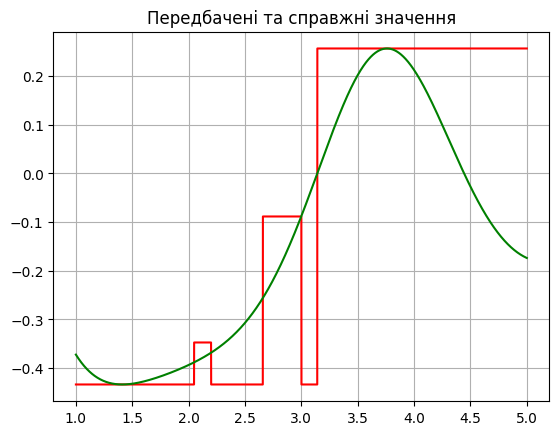

In [23]:
z_predicted = []

for x, y in zip(x_values, y_values):
    max_x = get_max_function(x, gaussian_x_values, x_values)
    max_y = get_max_function(y, gaussian_y_values, y_values)
    max_z = next((rule[2] for rule in rules if rule[0] == max_x and rule[1] == max_y), None)

    if max_z is not None:
        z_predicted.append(z_means[max_z])

print(f"MAE: {mean_absolute_error(z_values, z_predicted):.2f}")
print(f"MSE: {mean_squared_error(z_values, z_predicted):.2f}")

plot_arguments_1 = {
    "x_values": x_values,
    "y_values": z_predicted,
    "color": "red"
}

plot_arguments_2 = {
    "x_values": x_values,
    "y_values": z_values,
    "color": "green"
}

build_plot(plot_arguments_1, plot_arguments_2, title = "Передбачені та справжні значення")

#### Трикутна функція приналежності

##### Розбиття даних на проміжки

In [24]:
X_SIGMA = 0.3
Y_SIGMA = 1.0
Z_SIGMA = 0.5

triangle_x_values = [fuzz.trimf(x_values, [mean - X_SIGMA, mean, mean + X_SIGMA]) for mean in x_means]
triangle_y_values = [fuzz.trimf(y_values, [mean - Y_SIGMA, mean, mean + Y_SIGMA]) for mean in y_means]
triangle_z_values = [fuzz.trimf(z_values, [mean - Z_SIGMA, mean, mean + Z_SIGMA]) for mean in z_means]

##### Візуалізація трикутної функції приналежності

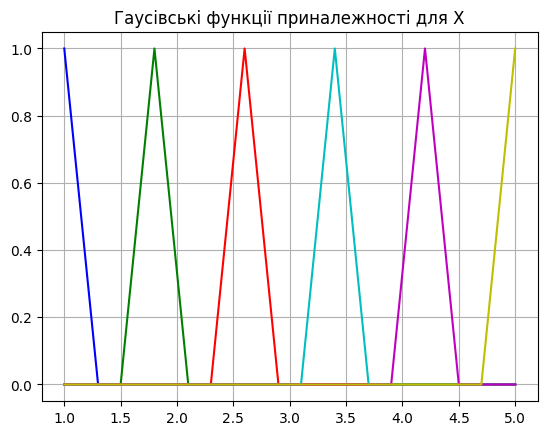

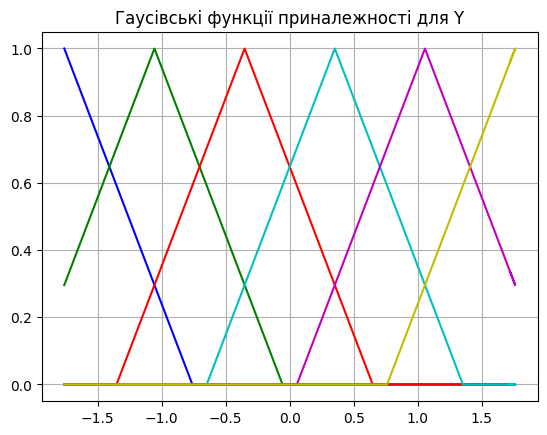

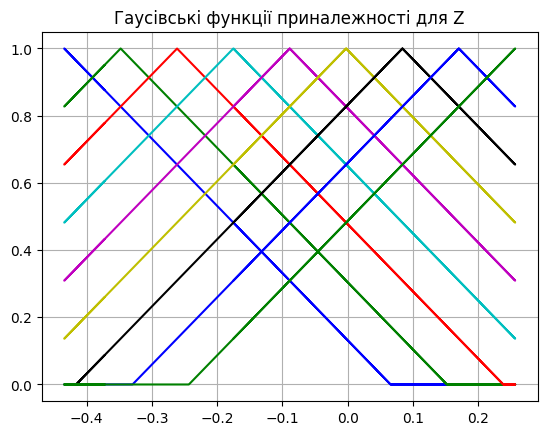

In [25]:
plot_arguments_x = {
    "x_values": x_values,
    "y_values": triangle_x_values
}

plot_arguments_y = {
    "x_values": y_values,
    "y_values": triangle_y_values
}

plot_arguments_z = {
    "x_values": z_values,
    "y_values": triangle_z_values
}

build_plot(plot_arguments_x, title = "Гаусівські функції приналежності для X")
build_plot(plot_arguments_y, title = "Гаусівські функції приналежності для Y")
build_plot(plot_arguments_z, title = "Гаусівські функції приналежності для Z")

##### Таблиця назв функцій

In [26]:
build_functions_table(x_means, y_means, z_values, triangle_z_values, IN_COUNT)

╒═════╤═══════╤═══════╤═══════╤═══════╤═══════╤═══════╕
│     │ mx1   │ mx2   │ mx3   │ mx4   │ mx5   │ mx6   │
╞═════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╡
│ my1 │ mf9   │ mf9   │ mf9   │ mf9   │ mf9   │ mf9   │
├─────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ my2 │ mf9   │ mf9   │ mf9   │ mf9   │ mf9   │ mf7   │
├─────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ my3 │ mf9   │ mf9   │ mf9   │ mf9   │ mf4   │ mf1   │
├─────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ my4 │ mf9   │ mf9   │ mf5   │ mf1   │ mf1   │ mf1   │
├─────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ my5 │ mf6   │ mf2   │ mf1   │ mf1   │ mf1   │ mf1   │
├─────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ my6 │ mf1   │ mf1   │ mf1   │ mf1   │ mf1   │ mf1   │
╘═════╧═══════╧═══════╧═══════╧═══════╧═══════╧═══════╛


##### Отримані правила

In [27]:
rules = generate_rules(x_means, y_means, z_values, triangle_z_values, IN_COUNT)

for rule in rules:
    print(f"if (x is mx{rule[0] + 1}) and (y is my{rule[1] + 1}) then (z is mf{rule[2] + 1})")

if (x is mx1) and (y is my1) then (z is mf9)
if (x is mx2) and (y is my1) then (z is mf9)
if (x is mx3) and (y is my1) then (z is mf9)
if (x is mx4) and (y is my1) then (z is mf9)
if (x is mx5) and (y is my1) then (z is mf9)
if (x is mx6) and (y is my1) then (z is mf9)
if (x is mx1) and (y is my2) then (z is mf9)
if (x is mx2) and (y is my2) then (z is mf9)
if (x is mx3) and (y is my2) then (z is mf9)
if (x is mx4) and (y is my2) then (z is mf9)
if (x is mx5) and (y is my2) then (z is mf9)
if (x is mx6) and (y is my2) then (z is mf7)
if (x is mx1) and (y is my3) then (z is mf9)
if (x is mx2) and (y is my3) then (z is mf9)
if (x is mx3) and (y is my3) then (z is mf9)
if (x is mx4) and (y is my3) then (z is mf9)
if (x is mx5) and (y is my3) then (z is mf4)
if (x is mx6) and (y is my3) then (z is mf1)
if (x is mx1) and (y is my4) then (z is mf9)
if (x is mx2) and (y is my4) then (z is mf9)
if (x is mx3) and (y is my4) then (z is mf5)
if (x is mx4) and (y is my4) then (z is mf1)
if (x is m

##### Оцінка похибки моделювання

MAE: 0.15
MSE: 0.04


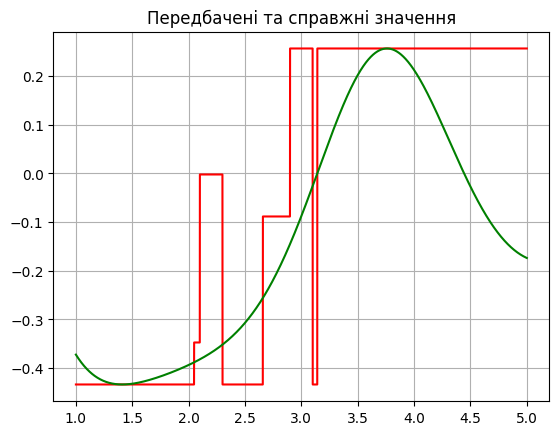

In [28]:
z_predicted = []

for x, y in zip(x_values, y_values):
    max_x = get_max_function(x, triangle_x_values, x_values)
    max_y = get_max_function(y, triangle_y_values, y_values)
    max_z = next((rule[2] for rule in rules if rule[0] == max_x and rule[1] == max_y), None)

    if max_z is not None:
        z_predicted.append(z_means[max_z])

print(f"MAE: {mean_absolute_error(z_values, z_predicted):.2f}")
print(f"MSE: {mean_squared_error(z_values, z_predicted):.2f}")

plot_arguments_1 = {
    "x_values": x_values,
    "y_values": z_predicted,
    "color": "red"
}

plot_arguments_2 = {
    "x_values": x_values,
    "y_values": z_values,
    "color": "green"
}

build_plot(plot_arguments_1, plot_arguments_2, title = "Передбачені та справжні значення")